In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
xls = pd.ExcelFile('/Users/zoemarkovits/Documents/Grad School/Fall 2019/Data Visualization/Project/Website Usage Data.xlsx')

df_cairo = pd.read_excel(xls, 'Cairo')
df_kei = pd.read_excel(xls, 'Kei')
df_zoe = pd.read_excel(xls, 'Zoe')
df_steven = pd.read_excel(xls, 'Steven')

#### Cairo's Data

In [3]:
df_cairo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
Date                 128 non-null datetime64[ns]
Time                 128 non-null object
Google               128 non-null int64
YouTube              128 non-null int64
Wikipedia            128 non-null int64
Shopping             128 non-null int64
Netflix              128 non-null int64
StackOverflow        128 non-null int64
Python               128 non-null int64
Github               128 non-null int64
GoogleSuites         128 non-null int64
Email                128 non-null int64
InstagramFacebook    128 non-null int64
Location             128 non-null object
News                 128 non-null int64
dtypes: datetime64[ns](1), int64(12), object(2)
memory usage: 15.1+ KB


In [4]:
df_cairo['DayofWeek'] = df_cairo['Date'].dt.dayofweek

In [5]:
# Website Categories: 
    # Social Media = Instagram, Facebook
    # News = News 
    # Streaming = YouTube, Netflix
    # Education = StackOverflow, Python, GitHub, Google, GoogleSuites 

df_cairo['Social_Media'] = df_cairo['InstagramFacebook'] 
df_cairo['Streaming'] = df_cairo['YouTube'] + df_cairo['Netflix']
df_cairo['Education'] = df_cairo['StackOverflow'] + df_cairo['Python'] + df_cairo['Github'] + df_cairo['Google'] + df_cairo['GoogleSuites']

In [6]:
# Total Counts

df_cairo['Total'] = df_cairo['Google'] + df_cairo['YouTube'] + df_cairo['Wikipedia'] + df_cairo['Shopping'] + df_cairo['Netflix'] + df_cairo['StackOverflow'] + df_cairo['Python'] + df_cairo['Github'] + df_cairo['GoogleSuites'] + df_cairo['Email'] + df_cairo['InstagramFacebook']

In [7]:
df_cairo.head()

,Date,Time,Google,YouTube,Wikipedia,Shopping,Netflix,StackOverflow,Python,Github,GoogleSuites,Email,InstagramFacebook,Location,News,DayofWeek,Social_Media,Streaming,Education,Total
0,2019-10-08,Morning,3,0,0,0,0,0,0,0,3,3,0,Home,0,1,0,0,6,9
1,2019-10-08,Afternoon,5,0,0,0,0,0,0,0,0,1,0,School,2,1,0,0,5,6
2,2019-10-08,Evening,1,0,0,0,0,0,0,0,14,2,2,Home,4,1,2,0,15,19
3,2019-10-08,Night,2,0,0,0,3,0,0,0,0,0,0,Home,0,1,0,3,2,5
4,2019-10-09,Morning,5,0,0,0,0,0,0,0,2,0,67,Home,5,2,67,0,7,74


           News  Social_Media  Streaming  Education
Time                                               
Afternoon    32            49         83        641
Evening      21            32         42        386
Morning      45           166         50        219
Night         5            12         19        147
Night         0             0          0          0


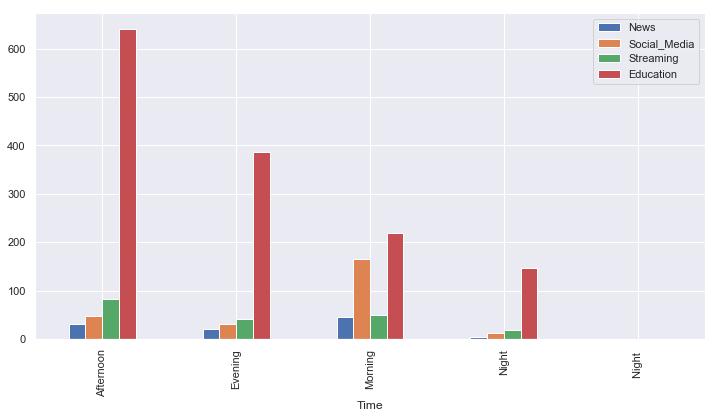

In [8]:
# Plot 1

cairo_time_groups = df_cairo.groupby('Time')[['News','Social_Media','Streaming','Education']].sum()
print(cairo_time_groups.head())

df_cairo.groupby('Time')[['News','Social_Media','Streaming','Education']].sum().plot.bar(figsize=(12,6))

In [9]:
# Saving Plot 1 for D3

cairo_plot_one = df_cairo.groupby('Time')[['News','Social_Media','Streaming','Education']].sum()
cairo_plot_one.to_csv('cairo_plot_one.csv')

In [10]:
# Plot 2 

cairo_education_percent = (df_cairo['Education'].sum()/df_cairo['Total'].sum())*100
cairo_news_percent = (df_cairo['News'].sum()/df_cairo['Total'].sum())*100
cairo_social_percent = (df_cairo['Social_Media'].sum()/df_cairo['Total'].sum())*100
cairo_stream_percent = (df_cairo['Streaming'].sum()/df_cairo['Total'].sum())*100

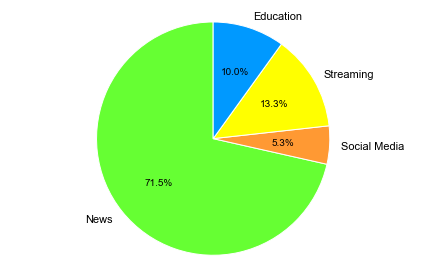

In [11]:
labels = ['News','Social Media','Streaming','Education']
sizes = [cairo_education_percent, cairo_news_percent, cairo_social_percent, cairo_stream_percent]
colors = ["#66ff33","#ff9933","#ffff00","#0099ff"]


fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')

ax1.axis('equal')  
plt.tight_layout()
plt.show()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


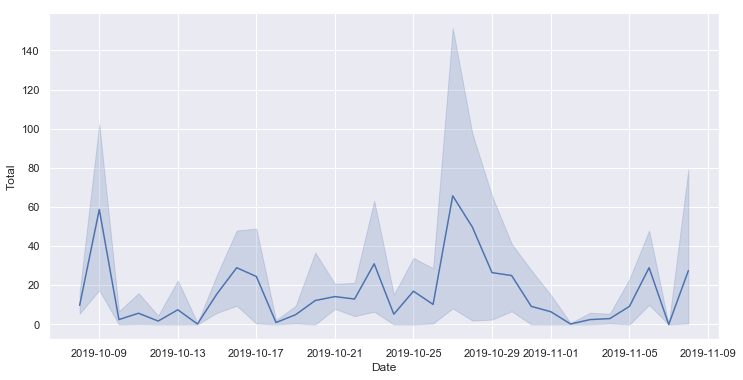

In [12]:
# Plot 3

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Total', data=df_cairo)

#### Kei's Data

In [13]:
df_kei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 13 columns):
Date               128 non-null datetime64[ns]
Time               128 non-null object
Google             128 non-null int64
YouTube            128 non-null int64
Wikipedia          128 non-null int64
Medium             128 non-null int64
StackOverflow      128 non-null int64
JupyterNotebook    128 non-null int64
Github             128 non-null int64
Facebook           128 non-null int64
GoogleSuites       128 non-null int64
Email              128 non-null int64
Location           128 non-null object
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 13.1+ KB


In [14]:
df_kei['DayofWeek'] = df_kei['Date'].dt.dayofweek

In [15]:
# Website Categories: 
    # Social Media = Facebook
    # Streaming = YouTube
    # Education = Wikipedia, Medium, StackOverflow, Jupyter, GitHub, Gmail
    # Google 
    
df_kei['Social_Media'] = df_kei['Facebook'] 
df_kei['Streaming'] = df_kei['YouTube'] 
df_kei['Education'] = df_kei['Wikipedia'] + df_kei['Medium'] + df_kei['StackOverflow'] + df_kei['JupyterNotebook'] + df_kei['Github'] + df_kei['Email']

In [16]:
# Total Counts

df_kei['Total'] = df_kei['Google'] + df_kei['YouTube'] + df_kei['Wikipedia'] + df_kei['Medium'] + df_kei['StackOverflow'] + df_kei['JupyterNotebook'] + df_kei['Github'] + df_kei['Facebook'] + df_kei['GoogleSuites'] + df_kei['Email']

In [17]:
df_kei.head()

,Date,Time,Google,YouTube,Wikipedia,Medium,StackOverflow,JupyterNotebook,Github,Facebook,GoogleSuites,Email,Location,DayofWeek,Social_Media,Streaming,Education,Total
0,2019-10-08,Morning,0,0,0,0,0,0,0,0,0,0,Home,1,0,0,0,0
1,2019-10-08,Afternoon,0,0,0,0,0,0,0,0,0,0,work,1,0,0,0,0
2,2019-10-08,Evening,0,0,0,0,0,0,0,0,0,0,School,1,0,0,0,0
3,2019-10-08,Night,0,0,0,0,0,0,0,0,0,0,Home,1,0,0,0,0
4,2019-10-09,Morning,14,3,1,0,2,0,0,0,2,0,School,2,0,3,3,22


           Social_Media  Streaming  Education
Time                                         
Afternoon            11         54        212
Evening              19         44        290
Morning              17         15        146
Night                13         32        131


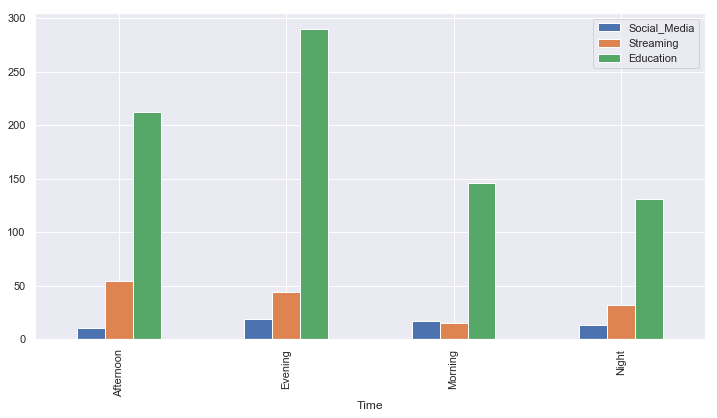

In [18]:
# Plot 1

kei_time_groups = df_kei.groupby('Time')[['Social_Media','Streaming','Education']].sum()
print(kei_time_groups.head())

df_kei.groupby('Time')[['Social_Media','Streaming','Education']].sum().plot.bar(figsize=(12,6))

In [19]:
# Saving Plot 1 for D3

kei_plot_one = df_kei.groupby('Time')[['Social_Media','Streaming','Education']].sum()
kei_plot_one.to_csv('kei_plot_one.csv')

In [20]:
# Plot 2 

kei_social_percent = (df_kei['Social_Media'].sum()/df_kei['Total'].sum())*100
kei_stream_percent = (df_kei['Streaming'].sum()/df_kei['Total'].sum())*100
kei_education_percent = (df_kei['Education'].sum()/df_kei['Total'].sum())*100

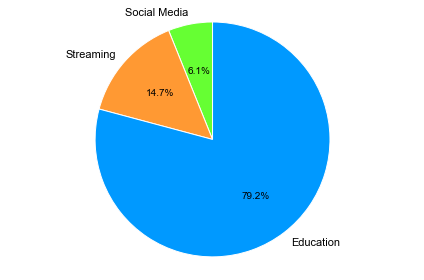

In [21]:
labels = ['Social Media','Streaming','Education']
sizes = [kei_social_percent,kei_stream_percent,kei_education_percent]
colors = ["#66ff33","#ff9933","#0099ff"]


fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')

ax1.axis('equal')  
plt.tight_layout()
plt.show()

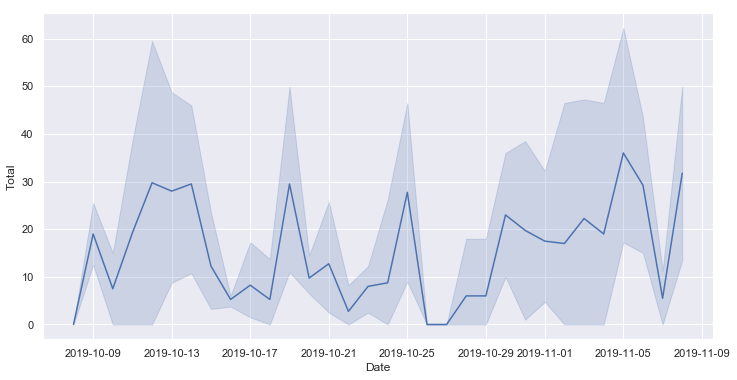

In [22]:
# Plot 3

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Total', data=df_kei)

#### Zoe's Data

In [23]:
df_zoe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
Date            128 non-null datetime64[ns]
Time            128 non-null object
Gmail           128 non-null int64
Blackboard      128 non-null int64
Vulture         128 non-null int64
AVClub          128 non-null int64
VanityFair      128 non-null int64
Eater           128 non-null int64
Pitchfork       128 non-null int64
YouTube         128 non-null int64
Twitter         128 non-null int64
Amazon          128 non-null int64
Slate           127 non-null float64
NewYorkTimes    128 non-null int64
Location        128 non-null object
dtypes: datetime64[ns](1), float64(1), int64(11), object(2)
memory usage: 15.1+ KB


In [24]:
df_zoe['DayofWeek'] = df_zoe['Date'].dt.dayofweek

In [25]:
# Website Categories: 
    # Social Media = Twitter
    # News = New York Times, Slate, Pitchfork,  
    # Streaming = YouTube
    # Education = Gmail, Blackboard

df_zoe['Social_Media'] = df_zoe['Twitter'] 
df_zoe['News'] = df_zoe['NewYorkTimes'] + df_zoe['Slate'] + df_zoe['Pitchfork']
df_zoe['Streaming'] = df_zoe['YouTube'] 
df_zoe['Education'] = df_zoe['Gmail'] + df_zoe['Blackboard']

In [26]:
#Total Counts

df_zoe['Total'] = df_zoe['Gmail'] + df_zoe['Blackboard'] + df_zoe['Vulture'] + df_zoe['AVClub'] + df_zoe['VanityFair'] + df_zoe['Eater'] + df_zoe['Pitchfork'] + df_zoe['YouTube'] + df_zoe['Twitter'] + df_zoe['Amazon'] + df_zoe['Slate'] + df_zoe['NewYorkTimes']

In [27]:
df_zoe.head()

,Date,Time,Gmail,Blackboard,Vulture,AVClub,VanityFair,Eater,Pitchfork,YouTube,Twitter,Amazon,Slate,NewYorkTimes,Location,DayofWeek,Social_Media,News,Streaming,Education,Total
0,2019-10-08,Morning,6,0,0,0,0,0,0,0,0,0,0.0,0,School,1,0,0.0,0,6,6.0
1,2019-10-08,Afternoon,6,8,6,4,1,1,5,8,6,0,0.0,2,Home,1,6,7.0,8,14,47.0
2,2019-10-08,Evening,2,0,1,0,0,2,0,0,10,3,0.0,0,Home,1,10,0.0,0,2,18.0
3,2019-10-08,Night,10,0,4,1,1,1,4,2,1,0,5.0,0,Home,1,1,9.0,2,10,29.0
4,2019-10-09,Morning,2,0,6,4,4,1,3,7,4,0,0.0,3,Home,2,4,6.0,7,2,34.0


            News  Social_Media  Streaming  Education
Time                                                
Afternoon  173.0            38         38        431
Evening    120.0           130         31        195
Morning    167.0            32         42        328
Night       25.0             4         74         61


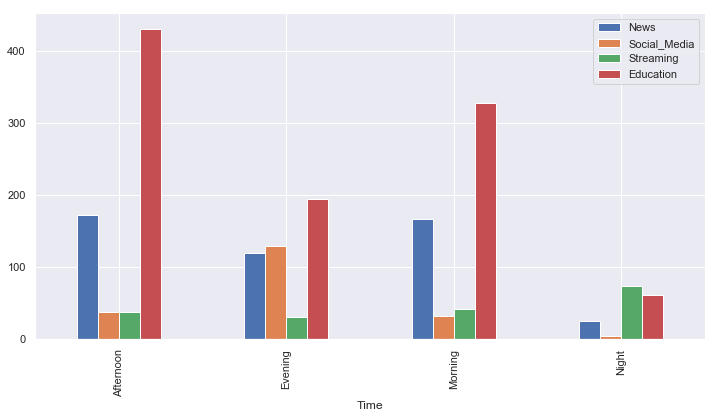

In [28]:
# Plot 1

zoe_time_groups = df_zoe.groupby('Time')[['News','Social_Media','Streaming','Education']].sum()
print(zoe_time_groups.head())

df_zoe.groupby('Time')[['News','Social_Media','Streaming','Education']].sum().plot.bar(figsize=(12,6))

In [29]:
# Saving Plot 1 for D3

zoe_plot_one = df_zoe.groupby('Time')[['News','Social_Media','Streaming','Education']].sum()
zoe_plot_one.to_csv('zoe_plot_one.csv')

In [30]:
# Plot 2 

zoe_news_percent = (df_zoe['News'].sum()/df_zoe['Total'].sum())*100
zoe_social_percent = (df_zoe['Social_Media'].sum()/df_zoe['Total'].sum())*100
zoe_stream_percent = (df_zoe['Streaming'].sum()/df_zoe['Total'].sum())*100
zoe_education_percent = (df_zoe['Education'].sum()/df_zoe['Total'].sum())*100

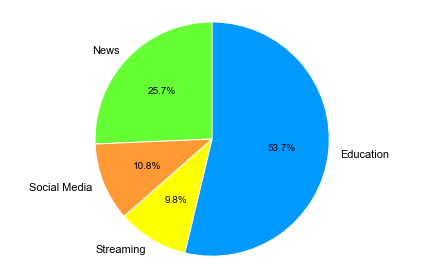

In [31]:
labels = ['News','Social Media','Streaming','Education']
sizes = [zoe_news_percent,zoe_social_percent,zoe_stream_percent,zoe_education_percent]
colors = ["#66ff33","#ff9933","#ffff00","#0099ff"]


fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')

ax1.axis('equal')  
plt.tight_layout()
plt.show()

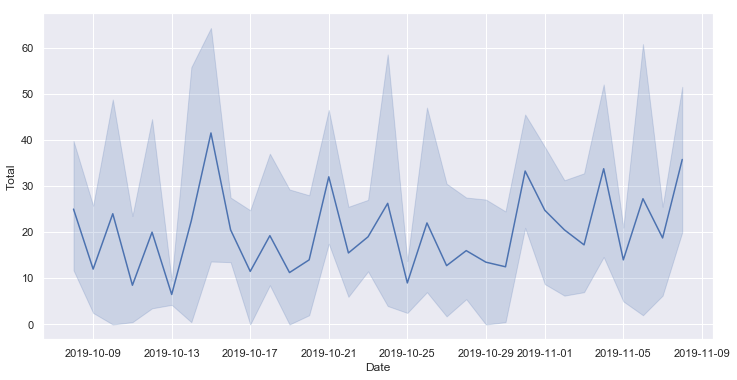

In [32]:
# Plot 3

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Total', data=df_zoe)

#### Steven's Data

In [33]:
df_steven.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 15 columns):
Date             128 non-null datetime64[ns]
Time             128 non-null object
Google           128 non-null int64
YouTube          128 non-null int64
Reddit           128 non-null int64
Wikipedia        128 non-null int64
Amazon           128 non-null int64
FBMessenger      128 non-null int64
StackOverflow    128 non-null int64
Python           128 non-null int64
Github           128 non-null int64
GoogleSuites     128 non-null int64
Email            128 non-null int64
Location         128 non-null object
News             128 non-null int64
dtypes: datetime64[ns](1), int64(12), object(2)
memory usage: 15.1+ KB


In [34]:
df_steven['DayofWeek'] = df_steven['Date'].dt.dayofweek

In [35]:
# Website Categories: 
    # Social Media = Reddit, FB Messenger
    # Streaming = YouTube
    # Education = Wikipedia, StackOverflow, Python, GitHub, GoogleSuites 
    
df_steven['Social_Media'] = df_steven['Reddit'] + df_steven['FBMessenger']
df_steven['Streaming'] = df_steven['YouTube'] 
df_steven['Education'] = df_steven['Wikipedia'] + df_steven['StackOverflow'] + df_steven['Python'] + df_steven['Github'] + df_steven['GoogleSuites']

In [36]:
# Total Counts

df_steven['Total'] = df_steven['Google'] + df_steven['YouTube'] + df_steven['Reddit'] + df_steven['Wikipedia'] + df_steven['Amazon'] + df_steven['FBMessenger'] + df_steven['StackOverflow'] + df_steven['Python'] + df_steven['Github'] + df_steven['GoogleSuites'] + df_steven['Email']

In [37]:
df_steven.head()

,Date,Time,Google,YouTube,Reddit,Wikipedia,Amazon,FBMessenger,StackOverflow,Python,Github,GoogleSuites,Email,Location,News,DayofWeek,Social_Media,Streaming,Education,Total
0,2019-10-08,Morning,7,6,0,0,0,2,1,1,0,2,3,Home,0,1,2,6,4,22
1,2019-10-08,Afternoon,18,12,0,2,0,0,8,1,0,0,6,Home,0,1,0,12,11,47
2,2019-10-08,Evening,26,3,0,0,0,2,10,9,0,0,2,Home,0,1,2,3,19,52
3,2019-10-08,Night,17,13,13,0,0,1,2,3,1,0,3,Home,2,1,14,13,6,53
4,2019-10-09,Morning,37,0,3,5,0,0,0,7,9,6,6,Home,0,2,3,0,27,73


           News  Social_Media  Streaming  Education
Time                                               
Afternoon    33            48        297        300
Evening      15            47        183        267
Morning      30            98        246        232
Night        21            94        348        180


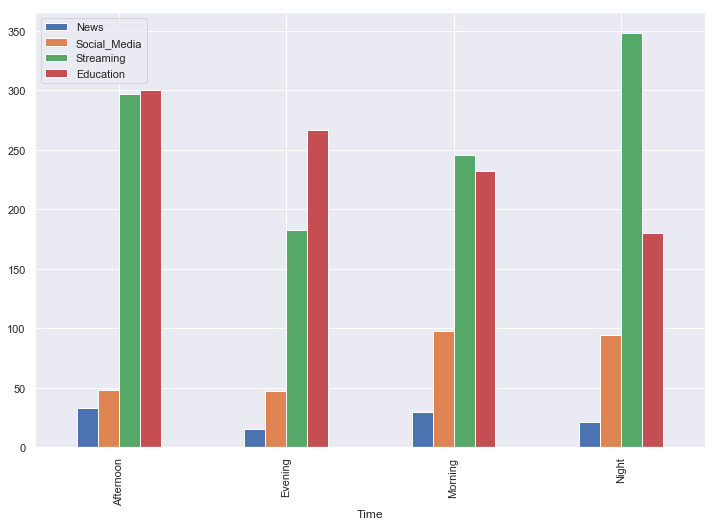

In [38]:
# Plot 1

steven_time_groups = df_steven.groupby('Time')[['News','Social_Media','Streaming','Education']].sum()
print(steven_time_groups.head())

df_steven.groupby('Time')[['News','Social_Media','Streaming','Education']].sum().plot.bar(figsize=(12,8))

In [39]:
# Saving Plot 1 for D3

steven_plot_one = df_steven.groupby('Time')[['News','Social_Media','Streaming','Education']].sum()
steven_plot_one.to_csv('steven_plot_one.csv')

In [40]:
# Plot 2 

print(df_steven['Education'].sum())
print(df_steven['News'].sum())
print(df_steven['Social_Media'].sum())
print(df_steven['Streaming'].sum())
print(df_steven['Total'].sum())

steven_news_percent = (df_steven['News'].sum()/df_steven['Total'].sum())*100
steven_social_percent = (df_steven['Social_Media'].sum()/df_steven['Total'].sum())*100
steven_stream_percent = (df_steven['Streaming'].sum()/df_steven['Total'].sum())*100
steven_education_percent = (df_steven['Education'].sum()/df_steven['Total'].sum())*100

979
99
287
1074
3844


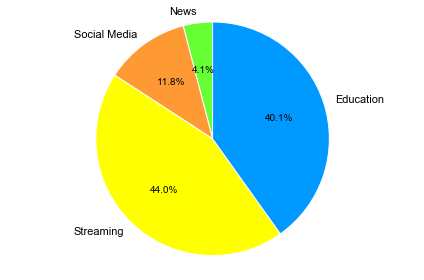

In [41]:
labels = ['News','Social Media','Streaming','Education']
sizes = [steven_news_percent,steven_social_percent,steven_stream_percent,steven_education_percent]
colors = ["#66ff33","#ff9933","#ffff00","#0099ff"]


fig1, ax1 = plt.subplots()

patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90)

for text in texts:
    text.set_color('black')
for autotext in autotexts:
    autotext.set_color('black')

ax1.axis('equal')  
plt.tight_layout()
plt.show()

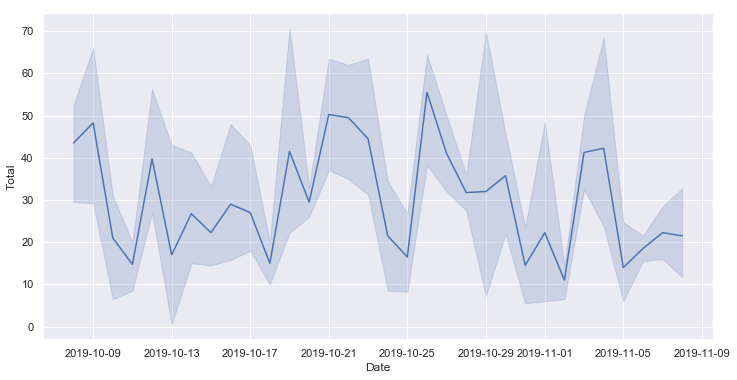

In [42]:
# Plot 3

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y='Total', data=df_steven)